



#### 불용어처리까지 된 파일불러오기

In [1]:
import pandas as pd

# CSV 파일 경로
csv_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\df_inheritance.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df_inheritance = pd.read_csv(csv_file_path)


# 불러온 데이터 확인
print(df_inheritance.head())

                                        판례내용_이유(전처리)  \
0  상고이유를 판단한다. 1. 사안의 개요 가. 사실관계 원심판결 이유와 기록에 따르면...   
1  상고이유를 판단한다. 1. 원심판결 이유와 기록에 따르면, 다음의 사실을 알 수 있...   
2  상고이유(상고이유서 제출기간이 지난 후에 제출된 상고이유보충서 기재는 상고이유를 보...   
3  상고이유를 판단한다. 1. 유증은 유언으로 수증자에게 일정한 재산을 무상으로 주기로...   
4  1. 처분의 경위 가. 당사자의 지위 등 소외 2는 2013. 10. 17. 유언을...   

                                        판례내용_제거(불용어)  클러스터  \
0  개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...     2   
1  인과 대한민국 혼인신고 마쳤고 자녀   미합중국 캘리포니아 출생 미합중국 시민권 취...     2   
2  지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세  거주 자의 사망 배우자 실...     3   
3  유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...     2   
4  지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...     3   

                                       클러스터키워드  
0      망인, 사망, 상속, 지급, 신청, 손해, 회사, 재산, 채권, 위자료  
1      망인, 사망, 상속, 지급, 신청, 손해, 회사, 재산, 채권, 위자료  
2  상속, 재산, 유류분, 분할, 상속인, 부동산, 한정승인, 증여, 피상, 포기  
3      망인, 사망, 상속, 지급, 신청, 손해, 회사, 재산, 채권, 위자료  
4  상속, 재산, 유류분, 분할, 상속인, 부동산, 한정승인, 증여, 피상, 포

In [2]:
df_inheritance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례내용_이유(전처리)  4141 non-null   object
 1   판례내용_제거(불용어)  4140 non-null   object
 2   클러스터          4162 non-null   int64 
 3   클러스터키워드       4162 non-null   object
dtypes: int64(1), object(3)
memory usage: 130.2+ KB


#### 클러스터링 최적의 수 찾기

In [20]:
# 결측치를 공백으로 대체
df_inheritance['판례내용_제거(불용어)'] = df_inheritance['판례내용_제거(불용어)'].fillna('')

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_array = vectorizer.fit_transform(df_inheritance['판례내용_제거(불용어)'])

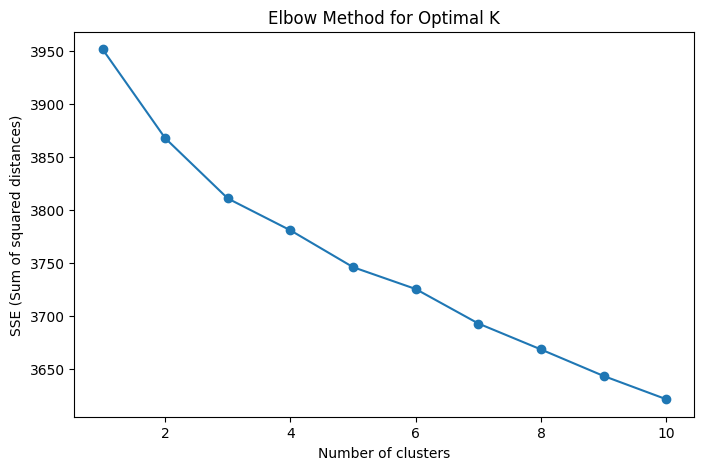

In [12]:

# 1. 엘보우(Elbow) 방법 : 클러스터링 수 결정
# 엘보우 방법은 클러스터 내 오차제곱합(SSE)을 계산하여 클러스터 수가 증가할 때 
# SSE의 감소가 급격히 완화되는 지점을 찾아 클러스터 수를 결정
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수의 범위 설정 (1부터 10까지)
cluster_range = range(1, 11)
sse = []  # SSE 값을 저장할 리스트


# 전체 단어 사용 tf-idf 결과에 대한 sse계산
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_array)  # TF-IDF로 벡터화된 데이터
    sse.append(kmeans.inertia_)  # inertia는 클러스터 내 오차제곱합(SSE)

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()


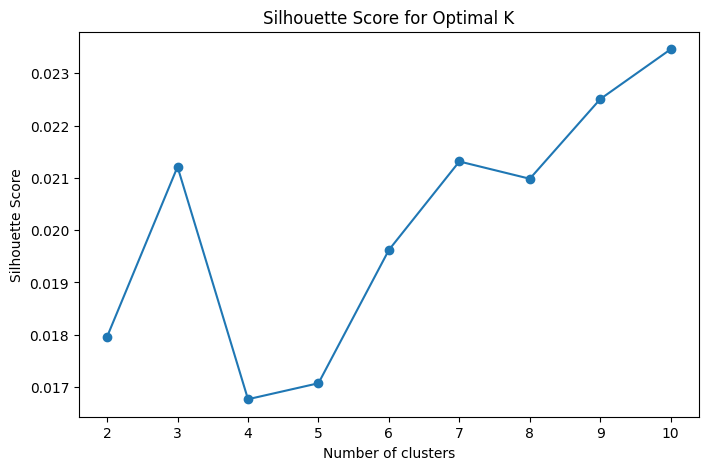

In [14]:
# 2. 실루엣(Silhouette) 점수 코드
# 실루엣 점수는 각 데이터 포인트가 얼마나 잘 속한 클러스터와 가까우며, 
# 다른 클러스터와는 얼마나 멀리 떨어져 있는지를 평가
# 값이 1에 가까울수록 클러스터링이 잘된 것

from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정 (2부터 10까지)
silhouette_scores = []


# 각 클러스터 개수에 대해 K-Means 모델 학습 및 실루엣 점수 계산
#전체단어
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array)
    silhouette_avg = silhouette_score(tfidf_array, clusters)
    silhouette_scores.append(silhouette_avg)


# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [9]:
# int오류나서 모든 값을 문자열로 변환
df_inheritance['판례내용_제거(불용어)'] = df_inheritance['판례내용_제거(불용어)'].astype(str)

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

vectorizer = TfidfVectorizer()

tfidf_metrix = vectorizer.fit_transform(df_inheritance['판례내용_제거(불용어)'])

# 1. K-Means 클러스터링 설정
num_clusters = 10  # 원하는 클러스터 개수 설정
kmeans_all = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # n_init 값을 명시적으로 설정

# 2. K-Means 모델 학습
kmeans_all.fit(tfidf_metrix)

# 3. 클러스터 레이블을 데이터프레임에 추가
df_inheritance['클러스터'] = kmeans_all.labels_

# 4. 클러스터링 결과 확인
print("클러스터링 결과:")
print(df_inheritance[['판례내용_제거(불용어)', '클러스터']].head())

클러스터링 결과:
                                        판례내용_제거(불용어)  클러스터
0  개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...     2
1  인과 대한민국 혼인신고 마쳤고 자녀   미합중국 캘리포니아 출생 미합중국 시민권 취...     2
2  지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세  거주 자의 사망 배우자 실...     3
3  유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...     2
4  지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...     3


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터 중심 단어 추출 함수
def extract_cluster_keywords(kmeans, feature_names, num_clusters):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = []  # 각 클러스터에 대한 빈 리스트 생성
        for ind in order_centroids[i, :10]:  # 각 클러스터에서 상위 10개 단어
            cluster_keywords[i].append(feature_names[ind])  # 중심 단어를 리스트에 추가
    return cluster_keywords

# TF-IDF 피처 이름과 클러스터 중심 단어 추출
feature_names_all = vectorizer.get_feature_names_out()  # TF-IDF 단어 목록
cluster_keywords_all = extract_cluster_keywords(kmeans_all, feature_names_all, num_clusters)

# 클러스터 중심 단어 출력
print("\n전체 단어 사용 TF-IDF 클러스터 중심 단어:")
for cluster_num, keywords in cluster_keywords_all.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")



전체 단어 사용 TF-IDF 클러스터 중심 단어:
클러스터 1: ['가액', '주식', '시가', '평가', '세법', '상속', '증여', '과세', '재산', '거래']
클러스터 2: ['점유', '토지', '취득시효', '소유권', '등기', '자주', '부동산', '완성', '취득', '의사']
클러스터 3: ['망인', '사망', '상속', '지급', '신청', '손해', '회사', '재산', '채권', '위자료']
클러스터 4: ['상속', '재산', '유류분', '분할', '상속인', '부동산', '한정승인', '증여', '피상', '포기']
클러스터 5: ['주택', '건물', '분양', '조합', '사업', '아파트', '계약', '임대차', '대지', '토지']
클러스터 6: ['등기', '부동산', '소유권', '이전', '명의', '토지', '원인', '상속', '명의신탁', '매매']
클러스터 7: ['토지', '농지', '등기', '소유권', '분배', '이전', '명의', '분할', '환지', '농지개혁법']
클러스터 8: ['보험', '보험금', '계약', '지급', '망인', '자동차', '보험료', '수익', '연금', '상해']
클러스터 9: ['상속세', '세액', '과세', '가액', '부과', '상속', '재산', '납부', '증여', '세법']
클러스터 10: ['임야', '종중', '등기', '소유권', '명의', '이전', '분묘', '소유', '소유권보존등기', '명의신탁']


### csv저장

In [34]:
# 클러스터 키워드를 df_inheritance에 추가
df_inheritance['클러스터키워드'] = df_inheritance['클러스터'].map(
    lambda x: ', '.join(cluster_keywords_all[x])
)

# 클러스터링 결과를 CSV 파일로 저장 (인덱스 및 헤더 제거)
df_inheritance.to_csv('df_inheritance.csv', index=False, encoding='utf-8-sig')


In [35]:
df_inheritance.head()

,판례내용_이유(전처리),판례내용_제거(불용어),클러스터,클러스터키워드
0,상고이유를 판단한다. 1. 사안의 개요 가. 사실관계 원심판결 이유와 기록에 따르면...,개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...,2,"망인, 사망, 상속, 지급, 신청, 손해, 회사, 재산, 채권, 위자료"
1,"상고이유를 판단한다. 1. 원심판결 이유와 기록에 따르면, 다음의 사실을 알 수 있...",인과 대한민국 혼인신고 마쳤고 자녀 미합중국 캘리포니아 출생 미합중국 시민권 취...,2,"망인, 사망, 상속, 지급, 신청, 손해, 회사, 재산, 채권, 위자료"
2,상고이유(상고이유서 제출기간이 지난 후에 제출된 상고이유보충서 기재는 상고이유를 보...,지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세 거주 자의 사망 배우자 실...,3,"상속, 재산, 유류분, 분할, 상속인, 부동산, 한정승인, 증여, 피상, 포기"
3,상고이유를 판단한다. 1. 유증은 유언으로 수증자에게 일정한 재산을 무상으로 주기로...,유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...,2,"망인, 사망, 상속, 지급, 신청, 손해, 회사, 재산, 채권, 위자료"
4,1. 처분의 경위 가. 당사자의 지위 등 소외 2는 2013. 10. 17. 유언을...,지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...,3,"상속, 재산, 유류분, 분할, 상속인, 부동산, 한정승인, 증여, 피상, 포기"


In [24]:
# 각 클러스터별 상위 단어 및 TF-IDF 값 출력
order_centroids = kmeans_all.cluster_centers_.argsort()[:, ::-1]
print("\n클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :20]:  # 상위 20개의 단어
        print(f"단어: {feature_names_all[ind]} - TF-IDF 값: {kmeans_all.cluster_centers_[i, ind]}")


클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 가액 - TF-IDF 값: 0.23475618064759413
단어: 주식 - TF-IDF 값: 0.15001910966441956
단어: 시가 - TF-IDF 값: 0.14393764016649488
단어: 평가 - TF-IDF 값: 0.13621289602291387
단어: 세법 - TF-IDF 값: 0.0946591470627887
단어: 상속 - TF-IDF 값: 0.0780812264155067
단어: 증여 - TF-IDF 값: 0.07655723563440953
단어: 과세 - TF-IDF 값: 0.07450509438650894
단어: 재산 - TF-IDF 값: 0.07284119584643509
단어: 거래 - TF-IDF 값: 0.060873360100939064
단어: 시행 - TF-IDF 값: 0.05966058220946394
단어: 양도 - TF-IDF 값: 0.05448789878846146
단어: 상속세 - TF-IDF 값: 0.05168238575799633
단어: 자산 - TF-IDF 값: 0.046995372258185314
단어: 증여세 - TF-IDF 값: 0.043751445024083846
단어: 법인 - TF-IDF 값: 0.04358721471342268
단어: 부과 - TF-IDF 값: 0.04165558251852383
단어: 주당 - TF-IDF 값: 0.04055493348274996
단어: 토지 - TF-IDF 값: 0.04055030374546218
단어: 가격 - TF-IDF 값: 0.038827845541665566

클러스터 2:
단어: 점유 - TF-IDF 값: 0.42811343536079044
단어: 토지 - TF-IDF 값: 0.21044081853784813
단어: 취득시효 - TF-IDF 값: 0.10776833396751838
단어: 소유권 - TF-IDF 값: 0.08005286954806386
단어: 등기 - TF-ID

클러스터 1: 상속 및 증여세 관련 재산 평가  
클러스터 2: 부동산 소유권 취득 시효와 점유  
클러스터 3: 상속인과 유족 관련 소송 및 손해배상  
클러스터 4: 상속 재산 분할 및 유류분 반환 청구  
클러스터 5: 주택 및 임대차 계약 관련 분쟁  
클러스터 6: 부동산 소유권 이전과 명의신탁 해지  
클러스터 7: 농지와 토지 소유권 분배와 환지  
클러스터 8: 보험금 및 손해배상 청구  
클러스터 9: 상속세 및 증여세 부과와 신고  
클러스터 10: 종중 재산 및 임야에 대한 소유권 분쟁  

### LDA추출하기

In [6]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import gensim
from nltk.corpus import stopwords

# 불용어 처리된 텍스트 데이터 추출 및 결측값 처리
documents = df_inheritance['판례내용_제거(불용어)'].fillna('').astype(str).tolist()

# 토큰화
tokenized_docs = [doc.split() for doc in text_data]

# LDA에 사용할 사전 생성
dictionary = corpora.Dictionary(tokenized_data)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

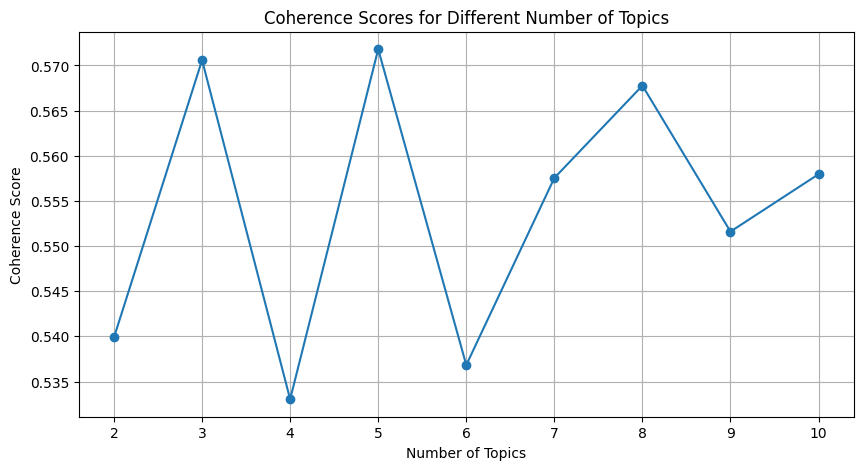

In [8]:
import pandas as pd
from konlpy.tag import Okt  # KoNLPy의 Okt 형태소 분석기를 가져옵니다.
from gensim.corpora.dictionary import Dictionary  # 단어 사전을 만들기 위해 Dictionary를 가져옵니다.
from gensim.models import LdaModel  # LDA 모델을 만들기 위해 LdaModel을 가져옵니다.
from gensim.models.coherencemodel import CoherenceModel  # Coherence Score를 계산하기 위한 모듈을 가져옵니다.
import re  # 정규 표현식을 위한 모듈을 가져옵니다.
import matplotlib.pyplot as plt  # 시각화를 위한 matplotlib.pyplot 모듈을 가져옵니다.

# 3. LDA 모델을 위한 Grid Search 및 Coherence Score 계산
coherence_scores = []  # Coherence Score를 저장할 리스트 초기화
topic_nums = range(2, 11)  # 2부터 19까지의 토픽 수 설정 (최적의 토픽 수를 찾기 위한 범위)

for num_topics in topic_nums:  # 설정한 각 토픽 수에 대해 반복
    # LDA 모델 학습: 지정된 토픽 수로 LDA 모델을 학습합니다.
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
    
    # Coherence Score 계산: LDA 모델의 일관성을 측정합니다.
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()  # Coherence Score를 계산합니다.
    coherence_scores.append(coherence_score)  # 계산된 Coherence Score를 리스트에 추가합니다.

# 4. 결과 시각화
plt.figure(figsize=(10, 5))  # 플롯 크기 설정
plt.plot(topic_nums, coherence_scores, marker='o')  # 각 토픽 수에 따른 Coherence Score를 플롯에 추가
plt.xlabel('Number of Topics')  # x축 레이블
plt.ylabel('Coherence Score')  # y축 레이블
plt.title('Coherence Scores for Different Number of Topics')  # 플롯 제목
plt.xticks(topic_nums)  # x축 눈금을 설정
plt.grid()  # 그리드 표시
plt.show()  # 플롯을 화면에 표시

#### gensim lda model활용

In [15]:
# LDA 모델 학습
num_topics = 5  # 원하는 주제 수
lda_model_5 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# 각 주제 출력
for idx, topic in lda_model_5.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.018*"망인" + 0.012*"손해" + 0.011*"사망" + 0.008*"의무" + 0.007*"지급" + 0.006*"위자료" + 0.006*")," + 0.006*"차량" + 0.006*"손해배상" + 0.005*"배상"
Topic 1: 0.046*"토지" + 0.020*"등기" + 0.020*"농지" + 0.020*"소유권" + 0.014*"점유" + 0.013*"상속" + 0.012*"이전" + 0.011*"본건" + 0.011*"분배" + 0.010*"소유"
Topic 2: 0.010*"회사" + 0.010*"사업" + 0.007*"주식" + 0.006*"계약" + 0.005*"조합" + 0.005*"주택" + 0.005*"시행" + 0.004*"법인" + 0.004*"분양" + 0.004*"관리"
Topic 3: 0.030*"등기" + 0.020*"소유권" + 0.017*"부동산" + 0.017*"명의" + 0.015*"이전" + 0.014*"본건" + 0.009*"매매" + 0.009*"임야" + 0.009*"소송" + 0.008*"계약"
Topic 4: 0.027*"상속" + 0.021*"재산" + 0.011*"가액" + 0.010*"증여" + 0.009*"상속인" + 0.007*"지급" + 0.007*"망인" + 0.007*"채권" + 0.007*"채무" + 0.006*"부동산"


In [10]:
# LDA 모델 학습
num_topics = 8  # 원하는 주제 수
lda_model_8 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# 각 주제 출력
for idx, topic in lda_model_8.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.021*"망인" + 0.013*"손해" + 0.012*"사망" + 0.008*"의무" + 0.008*"차량" + 0.008*"위자료" + 0.007*")," + 0.007*"지급" + 0.007*"손해배상" + 0.006*"배상"
Topic 1: 0.033*"토지" + 0.029*"농지" + 0.021*"본건" + 0.018*"상속" + 0.016*"분배" + 0.014*"점유" + 0.014*"소유권" + 0.010*"등기" + 0.010*"사망" + 0.009*"농지개혁법"
Topic 2: 0.009*"시설" + 0.006*"관리" + 0.005*"설치" + 0.005*"사업" + 0.005*"고엽제" + 0.005*"대한민국" + 0.004*"한국" + 0.004*"생활" + 0.004*"공탁" + 0.004*"),"
Topic 3: 0.041*"등기" + 0.027*"소유권" + 0.021*"이전" + 0.021*"명의" + 0.020*"부동산" + 0.012*"임야" + 0.010*"본건" + 0.009*"토지" + 0.009*"매매" + 0.008*"원인"
Topic 4: 0.027*"상속" + 0.021*"재산" + 0.012*"지급" + 0.012*"망인" + 0.011*"채권" + 0.010*"상속인" + 0.010*"채무" + 0.009*"보험" + 0.008*"민법" + 0.008*"사망"
Topic 5: 0.034*"토지" + 0.015*"건물" + 0.013*"사업" + 0.012*"주택" + 0.010*"계약" + 0.010*"취득" + 0.010*"시행" + 0.009*"조합" + 0.008*"분양" + 0.007*"양도"
Topic 6: 0.018*"주식" + 0.018*"회사" + 0.008*"법인" + 0.005*"주주" + 0.005*"발행" + 0.005*"거래" + 0.004*"명의" + 0.004*"평가" + 0.003*"계약" + 0.003*"주식회사"
Topic 7: 0.037*"상속" + 0.02

Topic 0: 손해배상과 사망 관련 법적 책임 (예: 차량 사고, 손해배상)  
Topic 1: 농지와 토지 상속 및 소유권 (예: 농지 분배, 토지 점유)  
Topic 2: 국가 관리 시설 및 공공사업 관련 문제 (예: 시설 관리, 공탁)  
Topic 3: 부동산 소유권 이전 및 등기 (예: 소유권 이전, 임야와 등기)  
Topic 4: 상속 재산과 채권, 채무 관련 법적 처리 (예: 재산 상속, 보험과 채권)  
Topic 5: 부동산 개발 및 건설 사업 (예: 토지 사업, 주택 분양)  
Topic 6: 회사와 주식 관련 법적 문제 (예: 주식 평가, 법인 거래)  
Topic 7: 상속세와 증여세 (예: 재산 증여, 세금 과세 및 납부)  

In [14]:
import pyLDAvis.gensim_models
import pyLDAvis

# pyLDAvis를 사용한 LDA 시각화
pyLDAvis.enable_notebook()  # Jupyter Notebook에서 사용 시
lda_vis = pyLDAvis.gensim_models.prepare(lda_model_5, corpus, dictionary)
pyLDAvis.display(lda_vis)

#감마값은 1에 가까울 수록 토픽에서 나오는 단어들의 빈도순으로 키워드들이 나오고 0에 가까워질수록 데이터 전체에서 나오는 단어들은 제하고 해당 토픽에만 나오는 단어들에 가중치를 줘서 키워드를 도출한다

### LatentDirichletAllocation으로 lda

In [16]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 문서 텍스트 데이터
documents =  df_inheritance['판례내용_제거(불용어)'].fillna('').astype(str).tolist()

# CountVectorizer로 벡터화 (TF 방식)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = vectorizer.fit_transform(documents)

# LDA 모델 설정 및 학습
num_topics = 8  # 원하는 주제 개수
lda_model_sk = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model_sk.fit(tf)

# 주제별 주요 단어 출력
num_words = 10  # 주제별 표시할 단어 수
words = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model_sk.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([words[i] for i in topic.argsort()[:-num_words - 1:-1]]))


Topic 0:
보험 망인 지급 손해 회사 사망 계약 의무 손해배상 금액
Topic 1:
가액 재산 과세 증여 주식 세법 부과 상속세 평가 세액
Topic 2:
신청 불법행위 사망 대한민국 국가 권리 소멸시효 소송 위자료 손해배상
Topic 3:
망인 병원 의무 치료 친일 사망 환자 손해 시설 세월호
Topic 4:
회사 주식 지급 발행 거래 계약 주식회사 주주 양도 임금
Topic 5:
토지 사업 건물 주택 조합 시행 분양 취득 조합원 공유
Topic 6:
등기 토지 소유권 이전 명의 부동산 임야 점유 소유 원인
Topic 7:
재산 부동산 채권 망인 상속인 채무 분할 계약 민법 반환


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 문서 텍스트 데이터
documents = df_inheritance['판례내용_제거(불용어)'].fillna('').astype(str).tolist()

# TfidfVectorizer로 벡터화 (TF-IDF 방식)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)

# LDA 모델 설정 및 학습
num_topics = 8  # 원하는 주제 개수
lda_model_sk = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model_sk.fit(tfidf)

# 주제별 주요 단어 출력
num_words = 10  # 주제별 표시할 단어 수
words = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model_sk.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([words[i] for i in topic.argsort()[:-num_words - 1:-1]]))


Topic 0:
망인 보험 손해 위자료 지급 손해배상 차량 보험금 연금 배상
Topic 1:
미쓰비시 등록면허세 초지 최석 김태 징용 김상열 유전자형 홍문표 석동
Topic 2:
영림 엔씨 팔리 선원 이충렬 이종구 이강수 에이즈 장윤식 동교동
Topic 3:
토지 등기 소유권 임야 점유 이전 명의 부동산 본건 농지
Topic 4:
상표 등록상표 상표권 저작권 저작물 사용권 정상품 노래 표장 소액사건심판법
Topic 5:
가액 주식 과세 세법 상속세 평가 시가 증여 세액 부과
Topic 6:
명인방법 분묘기지권 소집 손종 임목 총회 입목 고엽제 선출 음반
Topic 7:
재산 부동산 등기 상속인 망인 분할 채무 채권 계약 신청
